In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic dataset
data = {
    "Income": [45000, 54000, 58000, 35000, 61000, 72000, 40000, 52000, 80000, 67000],
    "CreditScore": [600, 650, 700, 400, 750, 800, 500, 640, 850, 720],
    "LoanAmount": [12000, 15000, 10000, 20000, 13000, 17000, 18000, 14000, 9000, 11000],
    "Approved": [1, 1, 1, 0, 1, 1, 0, 1, 1, 1]  # 1 = Approved, 0 = Rejected
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)


   Income  CreditScore  LoanAmount  Approved
0   45000          600       12000         1
1   54000          650       15000         1
2   58000          700       10000         1
3   35000          400       20000         0
4   61000          750       13000         1
5   72000          800       17000         1
6   40000          500       18000         0
7   52000          640       14000         1
8   80000          850        9000         1
9   67000          720       11000         1


             Income  CreditScore    LoanAmount   Approved
count     10.000000    10.000000     10.000000  10.000000
mean   56400.000000   661.000000  13900.000000   0.800000
std    14214.233868   135.928903   3604.010112   0.421637
min    35000.000000   400.000000   9000.000000   0.000000
25%    46750.000000   610.000000  11250.000000   1.000000
50%    56000.000000   675.000000  13500.000000   1.000000
75%    65500.000000   742.500000  16500.000000   1.000000
max    80000.000000   850.000000  20000.000000   1.000000
Approved
1    8
0    2
Name: count, dtype: int64


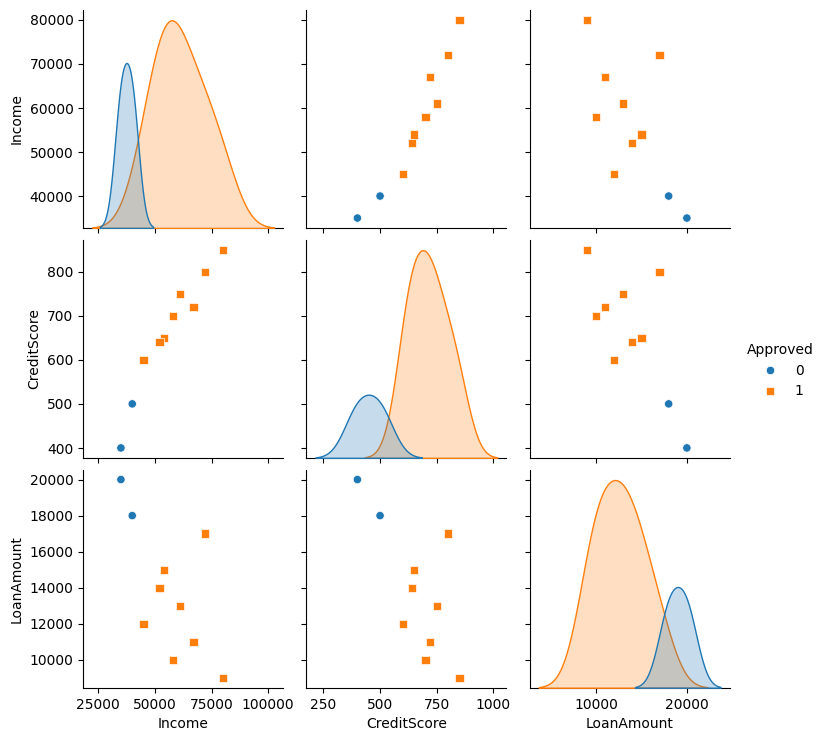

In [2]:
# Check basic statistics and class distribution
print(df.describe())
print(df['Approved'].value_counts())

# Visualize relationships between features
sns.pairplot(df, hue="Approved", markers=["o", "s"])
plt.show()


In [3]:
# Features and target
X = df[['Income', 'CreditScore', 'LoanAmount']]  # Input features
y = df['Approved']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 8, Testing samples: 2


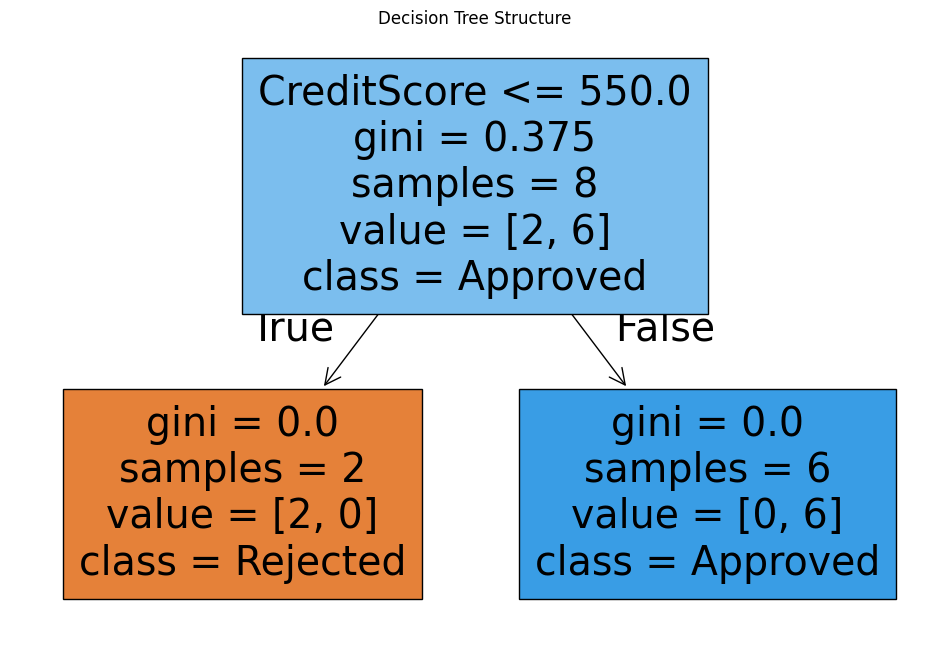

In [4]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=['Income', 'CreditScore', 'LoanAmount'], class_names=['Rejected', 'Approved'], filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [5]:
# Predict the classes of the test set
y_pred = dt.predict(X_test)

# Compare predictions with actual values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results)


   Actual  Predicted
8       1          1
1       1          1


In [7]:
# Classification report with corrected labels
print("Classification Report:\n", 
      classification_report(y_test, y_pred, labels=[0, 1], target_names=["Rejected", "Approved"]))


Classification Report:
               precision    recall  f1-score   support

    Rejected       0.00      0.00      0.00         0
    Approved       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       0.50      0.50      0.50         2
weighted avg       1.00      1.00      1.00         2



C:\Users\dshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

       Feature  Importance
1  CreditScore         1.0
0       Income         0.0
2   LoanAmount         0.0


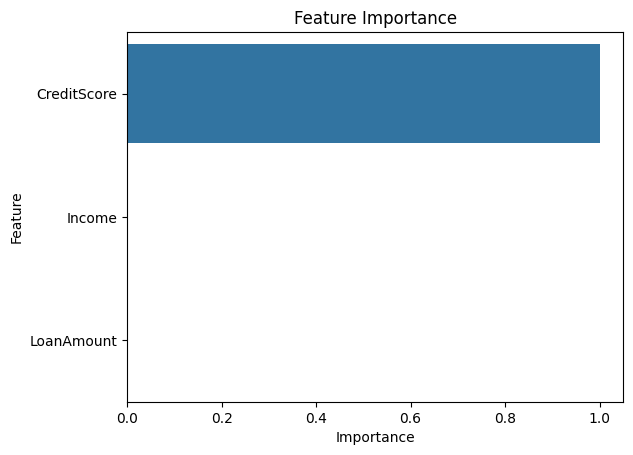

In [8]:
# Display feature importance
importance = pd.DataFrame({
    'Feature': ['Income', 'CreditScore', 'LoanAmount'],
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance")
plt.show()
